# If we assume that those orders palced by user_id 607 with 2000 items each time is reasonable, we have the following result then.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Import data and Pre-process

In [2]:
df = pd.read_csv('data.csv')
df= df[df['total_items']>0]

In [3]:
df


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [4]:
# convert data format for better visualization
df['created_at'] = pd.to_datetime(df['created_at'])

In [5]:
# create a column to store average amount(price) of items in a single order 
pd.set_option('mode.chained_assignment', None)
df['ave_amount_of_item'] = df['order_amount'] / df['total_items']

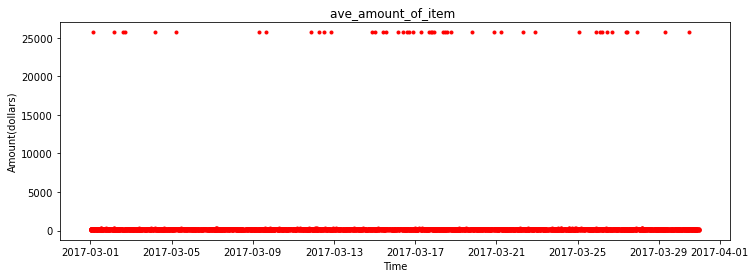

In [6]:
plt.figure(figsize=(12, 4))
plt.title('ave_amount_of_item ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['ave_amount_of_item'],'r.')
plt.show()

# 2 ) Filter out orders with extremly expensive item

In [7]:
df = df[df['ave_amount_of_item']<5000]

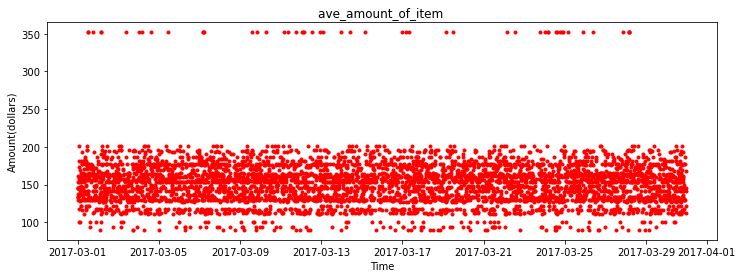

In [8]:
plt.figure(figsize=(12, 4))
plt.title('ave_amount_of_item ')
plt.xlabel('Time')
plt.ylabel('Amount(dollars)')
plt.plot(df['created_at'],df['ave_amount_of_item'],'r.')
plt.show()

# Now we have what we are looking for and ready to do the calculation

In [9]:
total_amount = df['order_amount'].sum()
total_items = df['total_items'].sum()
AOV = total_amount/total_items


In [10]:
AOV

307.01149425287355